In [ ]:
from matplotlib.backend_bases import Gcf
import pandas as pd
import numpy as np
import sklearn as sk
import networkx as nx
import matplotlib.pyplot as plt
from random import randrange
from datetime import datetime, timedelta
import copy



class Node:
  def __init__(self, id): 
    self.trucks = []
    self.ID = id
    self.packages = []

  def __eq__(self, other):
    return self.ID == other.ID
  
  def __hash__(self):
    return int(self.ID)
  
  def __repr__(self):
    return str(self.ID)


class Package:
  def __init__(self, start_node, end_node, age, id):
    self.cur_node = start_node
    self.end_node = end_node
    self.age = age
    self.id = id
    self.truck = None
    self.attach_truck()
    self.positions = [start_node]
    self.cur_node.packages.append(self)

  def attach_truck(self):
    for truck in self.cur_node.trucks:
      if truck.package == None:
        self.truck = truck
        self.truck.pick_package(self)
        break

  def gen_legal_nodes(self):
    global G
    if (self.cur_node != self.end_node and self.truck != None):
      it = G.neighbors(self.cur_node)
      if it == None:
        return []
      return [node for node in list(it) if not node in self.positions]
    else:
      return []
    

  def move_package(self, end_node):
    if self.truck != None:
      self.truck.move_truck(end_node)

 


  def __repr__(self):
    return str(self.id)



class Truck:
  def __init__(self, home_node, id):
    self.home_node = home_node;
    self.curr_node = home_node;
    self.id = id
    self.curr_node.trucks.append(self)
    self.package = None



  def pick_package(self, package):
    self.package = package
    package.truck = self

  def move_truck(self, end_node, going_home = False):
    if self.curr_node != end_node:
      if self.package !=None:
        self.package.age+= 4
        self.package.cur_node.packages.remove(self.package)
        self.package.cur_node = end_node
        self.package.cur_node.packages.append(self.package)
        self.package.positions.append(end_node)
        if going_home:
          if len(self.package.cur_node.trucks) != 0:
            self.package.truck = self.package.cur_node.trucks[0]
        else:
          self.package.truck = None

        
    

      self.curr_node.trucks.remove(self)
      self.curr_node = end_node
      self.curr_node.trucks.append(self)
      self.package = None
    



  def return_home(self):
 #   print(self.package == None)
   # print(self.home_node, self.curr_node)
   # print(len(self.home_node.trucks))
    if self.package == None and self.home_node != self.curr_node:
      self.move_truck(self.home_node)
      return -5
    else:
      self.move_truck(self.home_node, True)
      return 0
   
      



  def __repr__(self):
    return str(self.id) + " " + str(self.home_node.ID) + ": " + repr(self.package)


def reached_state():
  for package in packages:
    if package.gen_legal_nodes() != [] and len(package.cur_node.trucks)!=0:
      return False
  return True

def end_state():
  for package in packages:
    if package.gen_legal_nodes() == [] and package.cur_node != package.end_node and len(package.cur_node.trucks)==0:  
      return True

  return False







In [ ]:
trucks = []

def add_trucks(node, num_trucks):
  for i in range(1, num_trucks+1):
    trucks.append(Truck(node, "A" + str(i)))

nodes = [Node("001"), Node("002"), Node("003"), Node("004"), Node("005"), Node("006"), Node("007"), Node("008"), Node("009"), Node("010"), Node("011"), Node("012"), Node("013"), Node("014"), Node("015"), Node("016"), Node("017")]
add_trucks(nodes[4], 5)
add_trucks(nodes[5], 5)
add_trucks(nodes[6], 5)
add_trucks(nodes[11], 5)
add_trucks(nodes[12], 5)
add_trucks(nodes[13], 5)
add_trucks(nodes[16], 5)

packages = [Package(nodes[4], nodes[16], 0, "A"), Package(nodes[12], nodes[4], 0, "B"), Package(nodes[11], nodes[16], 0, "C"), Package(nodes[13], nodes[5], 0, "D"), Package(nodes[5], nodes[6], 0, "E"), Package(nodes[6], nodes[11], 0, "F"), Package(nodes[16], nodes[5], 0, "G")]
# packages[0].move_package(nodes[7])
# packages[0].move_package(nodes[11])
# packages[0].move_package(nodes[14])
# packages[0].move_package(nodes[16])




In [ ]:

global G
G = nx.Graph()




G.add_nodes_from(nodes)
G.add_edge(nodes[0], nodes[4], weight = 5)
G.add_edge(nodes[1], nodes[4], weight = 4)
G.add_edge(nodes[1], nodes[5], weight = 3)
G.add_edge(nodes[2], nodes[5], weight = 3)
G.add_edge(nodes[2], nodes[6], weight = 4)
G.add_edge(nodes[3], nodes[6], weight = 5)

G.add_edge(nodes[7], nodes[4], weight = 3)
G.add_edge(nodes[8], nodes[4], weight = 4)
G.add_edge(nodes[8], nodes[5], weight = 5)
G.add_edge(nodes[9], nodes[5], weight = 5)
G.add_edge(nodes[9], nodes[6], weight = 4)
G.add_edge(nodes[10], nodes[6], weight = 3)

G.add_edge(nodes[7], nodes[11], weight = 4)
G.add_edge(nodes[8], nodes[11], weight = 3)
G.add_edge(nodes[8], nodes[12], weight = 5)
G.add_edge(nodes[9], nodes[12], weight = 5)
G.add_edge(nodes[9], nodes[13], weight = 3)
G.add_edge(nodes[10], nodes[13], weight = 4)

G.add_edge(nodes[14], nodes[11], weight = 2)
G.add_edge(nodes[14], nodes[12], weight = 3)
G.add_edge(nodes[15], nodes[12], weight = 4)
G.add_edge(nodes[15], nodes[13], weight = 5)

G.add_edge(nodes[14], nodes[16], weight = 3)
G.add_edge(nodes[15], nodes[16], weight = 4)





In [ ]:

def disp():
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

  no_packages = [u for (u, v) in G.nodes(data=True) if len(u.packages)==0]
  is_packages = [u for (u, v) in G.nodes(data=True) if len(u.packages)!=0]


  pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility
  # nodes

  nx.draw_networkx_nodes(G, pos, nodelist = no_packages, node_size=1000, node_color = "green")
  nx.draw_networkx_nodes(G, pos, nodelist = is_packages, node_size=1000, node_color = "teal")

  # edges
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
  nx.draw_networkx_edges(
      G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
  )




  nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.tight_layout()





  plt.show()




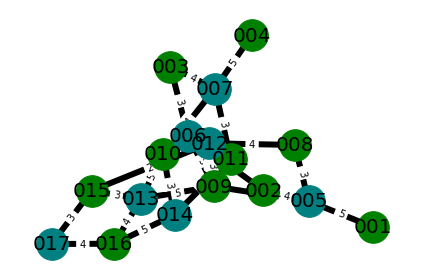

In [ ]:
# MCTS NODES 
# parent, score, children, visited
# state, packages, trucks -> 
# simulate -> while not all packages reached, repeat going.
# calc_value -> self.value / self.visits
# back_propogate -> add score to parents
# ucb -> importance of node 
# eliminate packages returning along same pathWay ! _> a2
#



class MonteCarlo:
    def __init__(self, packages, trucks, nodes):
        self.root = mcts_node(packages, trucks, nodes)
        self.children = self.root.generate_children()
     


    def traverse(self):
        now = datetime.now()
        while datetime.now() <= now + timedelta(seconds = 105):
          now2 = datetime.now()
          while datetime.now() <= now2 + timedelta(seconds = 15):
              child = self.root.select_best_child(self.children)
              best_node = copy.deepcopy(child)
              best_node.simulate()
              child.score += best_node.score
              child.visits +=1
          child_values = list(map(lambda x: x.calc_value(), self.children))
          self.root = self.children[child_values.index(max(child_values))]
          self.children = self.root.generate_children()
        return self.root

        


    def get_children(self):
      return self.children

disp()
class mcts_node:
  def __init__(self, packages, trucks, nodes, parent = None):
    self.packages = packages
    self.trucks = trucks
    self.nodes = nodes
    self.parent = parent
    self.children = []
    self.visits = 0
    self.score = 0

  def back_propogate(self, score):
    self.score += score
   # print(self.score)
    if self.parent != None:
      self.parent.back_propogate(score)


  def help_truck(self, package):
    it = G.neighbors(package.cur_node)
    it2 = G.neighbors(package.cur_node)
    nbrs = [node for node in list(it) if not node in package.positions and len(node.trucks)!=0 and node != package.cur_node]
    if len(nbrs) != 0:
      nbr = randrange(0, len(nbrs))
      if len(nbrs[nbr].trucks)!=0:
        truck = randrange(0, len(nbrs[nbr].trucks))
        cur_truck = nbrs[nbr].trucks[truck]
        cur_truck.package = None
        cur_truck.move_truck(package.cur_node)
        cur_truck.pick_package(package)


  def simulate(self):
    scr = 0
    while(not reached_state()):
      if (end_state()):
        self.back_propogate(-200000)
        return
      for package in self.packages:
        truckS = [truck for truck in self.trucks if truck.curr_node == package.cur_node]
        #print([truck for truck in self.trucks if truck.curr_node == package.cur_node])
        if truckS != []:
          #
          truck = truckS[randrange(0, len(truckS))]
          truck.pick_package(package)
          legal_nodes = package.gen_legal_nodes()
          if (len(legal_nodes)!=0):
            package.move_package(legal_nodes[randrange(0, len(legal_nodes))])
      
      for package in self.packages:
        legal_nodes = package.gen_legal_nodes()
        if len(legal_nodes)==0:
          self.help_truck(package)
 
      for truck in self.trucks:
        scr += truck.return_home()
        
        
    for package in self.packages:
      scr -= package.age
      
    
    self.back_propogate(scr)
   # print('love')
    

  def generate_children(self):
    children = []
    for i in range(50):
      for package in self.packages:
        truckS = [truck for truck in self.trucks if truck.curr_node == package.cur_node]
        if truckS != []:

          for truck in truckS:
            truck.pick_package(package)
            legal_nodes = package.gen_legal_nodes()
            if (len(legal_nodes)!=0):
              package.move_package(legal_nodes[randrange(0, len(legal_nodes))])

      
        for package in self.packages:
          legal_nodes = package.gen_legal_nodes()
          if len(legal_nodes)==0:
            self.help_truck(package)
          
        
  
        for truck in self.trucks:
          truck.return_home()

      children.append(mcts_node(packages, trucks, nodes, self))
        
     

    
    return children
  
  def get_ucb(self):
    if self.visits == 0:
      return 10000
    uct = self.score/self.visits + (randrange(1, 100))
    return uct

  def select_best_child(self, children):
      ucb_array = []

      for child in children:
          ucb_array.append(child.get_ucb())
      return children[ucb_array.index(max(ucb_array))]

  def calc_value(self):
    return self.score/self.visits

      
            
        

mc = mcts_node(packages, trucks, nodes)
mc.simulate()

mc = MonteCarlo(packages, trucks, nodes)
child1 = mc.traverse()

  



# root, nodes
# traverse -> simulate node to completion, pick node with highest score after 
#
#






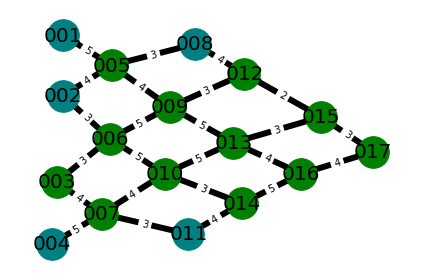

[005, 008, 012, 009, 013, 016, 017, 013, 010, 006, 003, 007, 004]
017
[013, 010, 007, 003, 006, 002, 005, 013, 009, 012, 015, 017, 016, 014, 011]
005
[012, 009, 006, 002, 005, 001]
017
[014, 016, 017, 015, 013, 010, 006, 013, 009, 012, 008, 005, 001]
006
[006, 002, 005, 001]
007
[007, 011, 014, 016, 013, 015, 012, 013, 009, 005, 008]
012
[017, 015, 013, 016, 014, 010, 006, 013, 009, 005, 002]
006


In [ ]:
trucks = child1.trucks
nodes = child1.nodes
packages = child1.packages


disp()

for package in packages:
  print([pos for pos in package.positions])
  print(package.end_node)


In [ ]:
print([(pack.cur_node, pack.id) for pack in packages])

[(004, 'A'), (011, 'B'), (001, 'C'), (001, 'D'), (001, 'E'), (008, 'F'), (002, 'G')]
